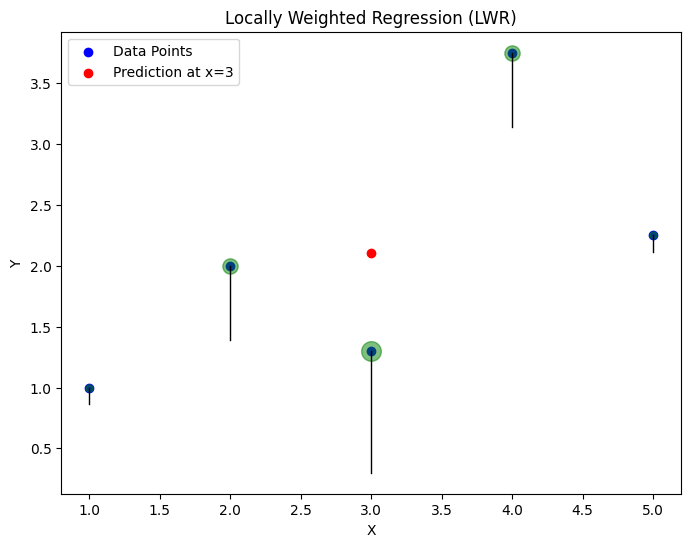

In [1]:
 import numpy as np
 import matplotlib.pyplot as plt
 def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))
 def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (Intercept)
    x_query_b = np.array([1, x_query])  # Query point with bias term
    
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Compute weights
    
    # Compute theta: (X^T W X)^-1 X^T W y
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    return x_query_b @ theta  # Return prediction
 # Dataset
 X = np.array([1, 2, 3, 4, 5])
 y = np.array([1, 2, 1.3, 3.75, 2.25])
 # Query point
 x_query = 3  # Point at which we perform LWR
 # Bandwidth parameter
 tau = 1.0
 # Compute prediction
 y_pred = locally_weighted_regression(X, y, x_query, tau)
 # Visualizing
 plt.figure(figsize=(8, 6))
 plt.scatter(X, y, color='blue', label='Data Points')
 plt.scatter(x_query, y_pred, color='red', label=f'Prediction at x={x_query}')
 # Plot weights effect
 weights = gaussian_kernel(X, x_query, tau)
 for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y[i] - weights[i]], 'k-', lw=1)
    plt.scatter(X[i], y[i], s=weights[i] * 200, color='green', alpha=0.5)
 plt.title("Locally Weighted Regression (LWR)")
 plt.xlabel("X")
 plt.ylabel("Y")
 plt.legend()
 plt.show()

 Explanation of the Code
 gaussian_kernel(x, x_query, tau): Computes weights using the 
Gaussian kernel.
 locally_weighted_regression(X, y, x_query, tau):
 Computes the weight matrix WW.
 Solves for θ using weighted least squares.
 Predicts yy for the query point xqxq .
 Visualization:
 Data points (blue dots).
 Prediction at xq=3xq =3 (red dot).
 Weight influence is shown using vertical lines and green 
bubbles.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

Locally Weighted Regression Function

In [4]:
def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]
    W = np.diag(gaussian_kernel(X, x_query, tau))

    try:
        theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    except np.linalg.LinAlgError:
        return np.nan

    x_query_b = np.array([1, x_query])
    return x_query_b @ theta

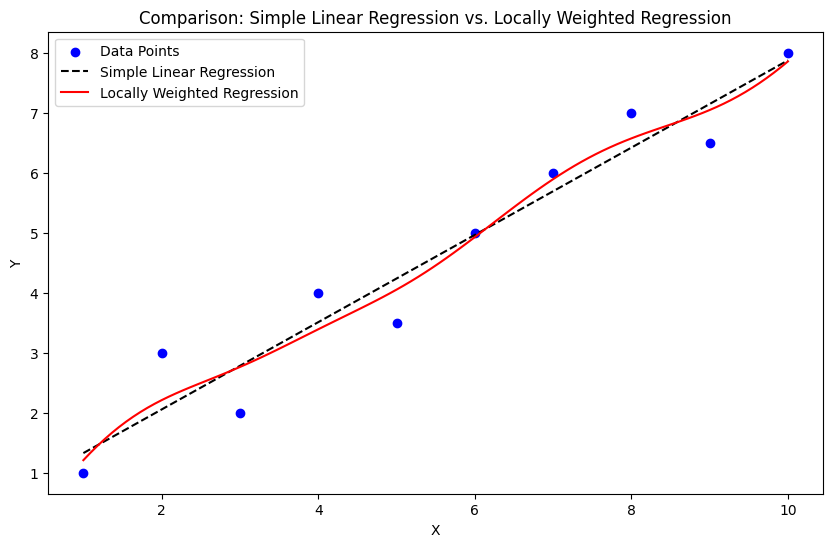

In [6]:
# Sample Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])

# Query points for LWR
X_query = np.linspace(1, 10, 100)
tau = 1.0 # Bandwidth parameter

# Compute LWR predictions
y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

# Simple Linear Regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')
plt.plot(X_query, y_lwr, color='red', label='Locally Weighted Regression')
plt.title("Comparison: Simple Linear Regression vs. Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [9]:
#  Gaussian Kernel Function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

In [10]:
def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]
    W = np.diag(gaussian_kernel(X, x_query, tau))

    # Using pseudo-inverse for robust calculation of theta
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y

    x_query_b = np.array([1, x_query])
    return x_query_b @ theta

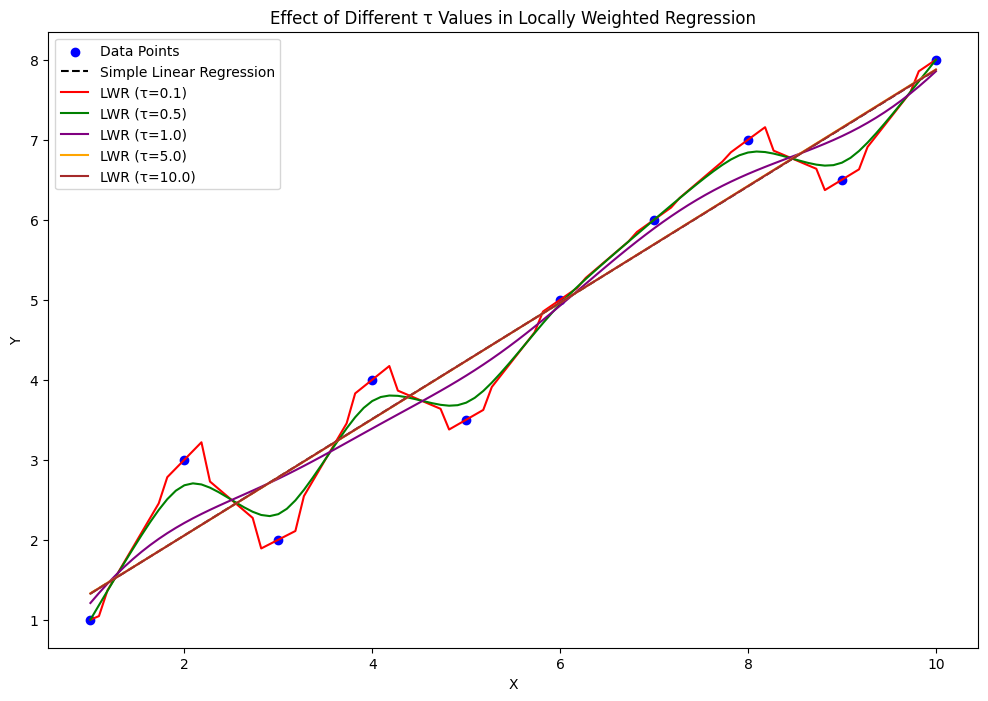

In [11]:
# Sample Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])

# Query points for LWR
X_query = np.linspace(1, 10, 100)
tau_values = [0.1, 0.5, 1.0, 5.0, 10.0]

# Simple Linear Regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')

# Plot LWR for different tau values
colors = ['red', 'green', 'purple', 'orange', 'brown']
for tau, color in zip(tau_values, colors):
    y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])
    plt.plot(X_query, y_lwr, color=color, label=f'LWR (τ={tau})')

plt.title("Effect of Different τ Values in Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

What τ Does
Weight Decay:

Small τ: Only very close points matter. The influence of data points drops off quickly. This makes your model very local, focusing heavily on immediate neighbors.
Large τ: Even distant points still have some say. The influence drops off slowly. This makes your model act more like a global linear regression, considering data from a wider area.
Model Complexity:

Small τ: The model becomes highly flexible and can follow every little bump in the data. This might lead to overfitting, where it learns the noise, not just the trend.
Large τ: The model becomes smoother and simpler. It might underfit if the true relationship is complex, as it tries to average out too much.
τ in Action
τ=0.1 (Small): Very local, almost like looking only at the closest point. The resulting line will be very wiggly, trying to hit every single data point.
τ=1.0 (Moderate): A good balance. The line will be smooth but still adaptable, capturing the general trend without being overly sensitive to every data point.
τ=10 (Large): Nearly global. All points get almost equal weight, making the LWR line look a lot like what you'd get from ordinary linear regression.